In [1]:
# ---------------------------------------------------
# Load uncertainties from Calore
# ---------------------------------------------------
data = np.loadtxt('./cov_matrix.dat')
ebins = data[:,0:2]  # Energy bins [GeV]
emeans = ebins.prod(axis=1)**0.5  # Geometric mean energy [GeV]
de = ebins[:,1] - ebins[:,0]  # Energy bin width [GeV]
flux = data[:,2]  # (Average flux)*E^2 in energy bin [GeV/cm2/s/sr]
flux_err = data[:,3]  # Flux error [GeV/cm2/s/sr]
empirical_variance = data[:,4:28]  # Only empirical component [(GeV/cm2/s/sr)^2]
full_variance = data[:,28:]  # Variance as it enters the spectral fit [(GeV/cm2/s/sr)^2]
empirical_sigma = sqrt(diagonal(empirical_variance))  # Diagonal elements
full_sigma = sqrt(diagonal(full_variance))  # Diagonal elements
# ---------------------------------------------------

-c:5: RuntimeWarning: invalid value encountered in sqrt
/home/carlson/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


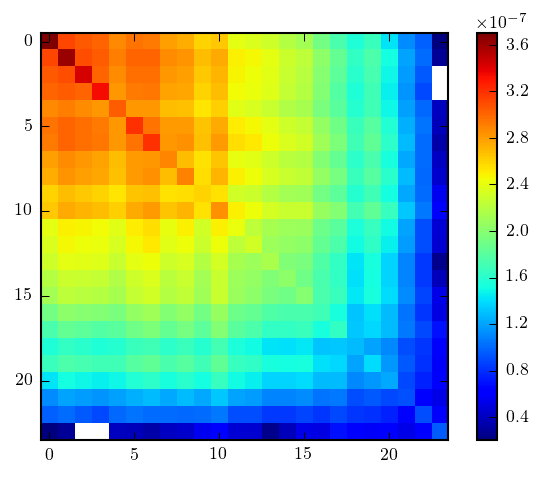

-c:14: RuntimeWarning: invalid value encountered in sqrt


<matplotlib.colorbar.Colorbar instance at 0x7f4f3622d050>

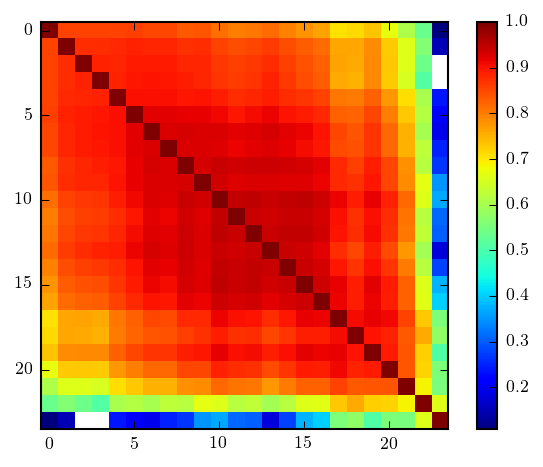

In [ ]:

import copy 
corr = copy.deepcopy(full_variance)

im = plt.imshow(np.sqrt(full_variance), interpolation='nearest')
plt.colorbar(im)
plt.show()

for i in range(24):
    for j in range(24):
        corr[j,i] = corr[j,i]/np.sqrt(full_variance[j,j])/np.sqrt(full_variance[i,i])


im = plt.imshow(np.sqrt(corr), interpolation='nearest')
plt.colorbar(im)

In [6]:
from scipy import linalg


def chi2(norm, alpha, Ecut, mode = 'total'):
    mu = f(norm, alpha, Ecut) * emeans**2
    if mode == 'stat':
        return sum((mu-flux)**2/flux_err**2)
    elif mode == 'total':
        a, b = meshgrid(mu-flux, mu-flux)
        return sum(a*b*invSigma)
    
import h5py

#h = h5py.File('./new/mod_s_46_XCO_P8_stripped.hdf5')
h = h5py.File('./new/mod_v4_30_XCO_P8_corrected_stripped.hdf5')
fit = h['/fit_results/GC'].attrs
energies = fit['energies']/1e3
flux = fit['flux_DM']*energies**2*1e3
flux_unc = fit['fluxunc_DM'].T[0,:]*energies**2*1e3


Sigma = full_variance + np.diag(flux_unc**2)

invSigma = inv(Sigma)  # Inverse matrix

mu=np.zeros(len(flux))


a, b = meshgrid(mu-flux, mu-flux)
chi2 = a*b*invSigma
#print a 


print 'chi^2, significance:', sum(chi2), sqrt(sum(chi2))
print 'significance above 1 GeV:', sum(chi2[10:]), sqrt(sum(chi2[10:]))
print 'Uncorrelated signif:', sqrt(sum(flux**2/full_sigma**2))

chi^2, significance: 48.8977326826 6.99269137619
significance above 1 GeV: 44.7529942626 6.68976787808
Uncorrelated signif: 6.43512893139


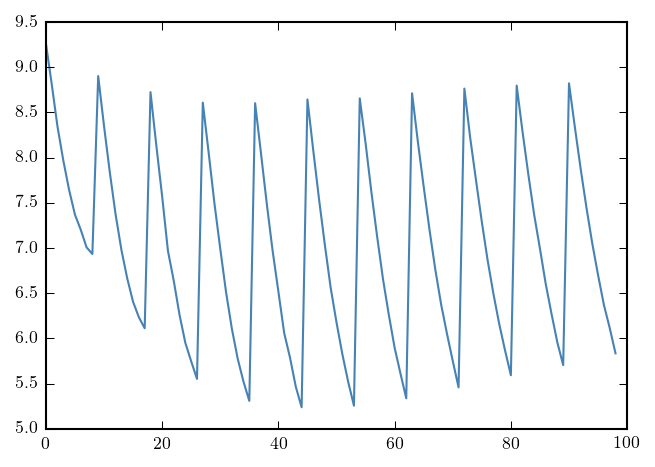

In [9]:
results = [] 

for i in range(0,99): 
    h = h5py.File('./new/mod_v4_%i_XCO_P8_corrected_stripped.hdf5'%i)
    fit = h['/fit_results/GC'].attrs
    energies = fit['energies']/1e3
    flux = fit['flux_DM']*energies**2*1e3
    flux_unc = fit['fluxunc_DM'].T[0,:]*energies**2*1e3


    Sigma = full_variance + np.diag(flux_unc**2)

    invSigma = inv(Sigma)  # Inverse matrix

    mu=np.zeros(len(flux))


    a, b = meshgrid(mu-flux, mu-flux)
    chi2 = a*b*invSigma
    
    results.append(sqrt(sum(chi2)))
    
plt.plot(results)